In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [50]:
df=pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
df.describe()
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
# CRIM - şəhərlər üzrə adambaşına düşən cinayət nisbəti
# ZN - 25,000 kv.ft-dən çox ərazilər üçün rayonlaşdırılmış yaşayış sahəsinin payı.
# INDUS - şəhərə düşən qeyri-pərakəndə biznes akrlarının nisbəti.
# CHAS - Charles River dummy dəyişəni (əgər trakt çayı əhatə edirsə 1; əks halda 0)
# NOX - azot oksidlərinin konsentrasiyası (10 milyona bir hissə)
# RM - yaşayış üçün orta otaq sayı
# YAŞ - 1940-cı ildən əvvəl tikilmiş sahibi tərəfindən işğal edilmiş bölmələrin nisbəti
# DIS - beş Boston məşğulluq mərkəzinə çəkilmiş məsafələr
# RAD - radial magistral yollara əlçatanlıq indeksi
# VERGİ - 10.000 ABŞ dolları üçün tam dəyərli əmlak vergisi dərəcəsi
# PTRATIO - şəhər üzrə şagird-müəllim nisbəti
# B - 1000(Bk - 0.63)^2 burada Bk qaradərililərin şəhərlər üzrə nisbətidir
# LSTAT - əhalinin % aşağı statusu
# MEDV - Sahibkarın yaşadığı evlərin orta dəyəri 1000 dollardır

In [57]:
df.rename(columns={'crim': 'cinayət_sayı', 
                   'zn': "rayonlaşmış_ərazi",
                    'indus': 'qeyri_pərakəndə_biznes', 
                    'chas': 'Charles_çayı', 
                    'nox': 'azot', 
                    'rm': 'otaq_sayı', 
                    'age': 'yaş', 
                    'dis': 'boston_mesafe', 
                    'rad': 'magistral_yol',
                    'tax': 'vergi', 
                    'ptratio': 'şagird_müəllim', 
                    'black': 'qara_dərili', 
                    'lstat': 'əhali_statusu', 
                    'medv': 'orta_dəyər'}, inplace=True)


In [122]:
df.corr()

,Unnamed: 0,cinayət_sayı,rayonlaşmış_ərazi,qeyri_pərakəndə_biznes,Charles_çayı,azot,otaq_sayı,yaş,boston_mesafe,magistral_yol,vergi,şagird_müəllim,qara_dərili,əhali_statusu,orta_dəyər
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
cinayət_sayı,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
rayonlaşmış_ərazi,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
qeyri_pərakəndə_biznes,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
Charles_çayı,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
azot,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
otaq_sayı,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
yaş,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
boston_mesafe,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
magistral_yol,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [132]:
c = df.corr()
so = c.unstack().sort_values(kind="quicksort")
print(so)


azot                    boston_mesafe            -0.769230
boston_mesafe           azot                     -0.769230
yaş                     boston_mesafe            -0.747881
boston_mesafe           yaş                      -0.747881
əhali_statusu           orta_dəyər               -0.737663
                                                    ...   
qeyri_pərakəndə_biznes  qeyri_pərakəndə_biznes    1.000000
rayonlaşmış_ərazi       rayonlaşmış_ərazi         1.000000
cinayət_sayı            cinayət_sayı              1.000000
əhali_statusu           əhali_statusu             1.000000
orta_dəyər              orta_dəyər                1.000000
Length: 225, dtype: float64


<AxesSubplot:>

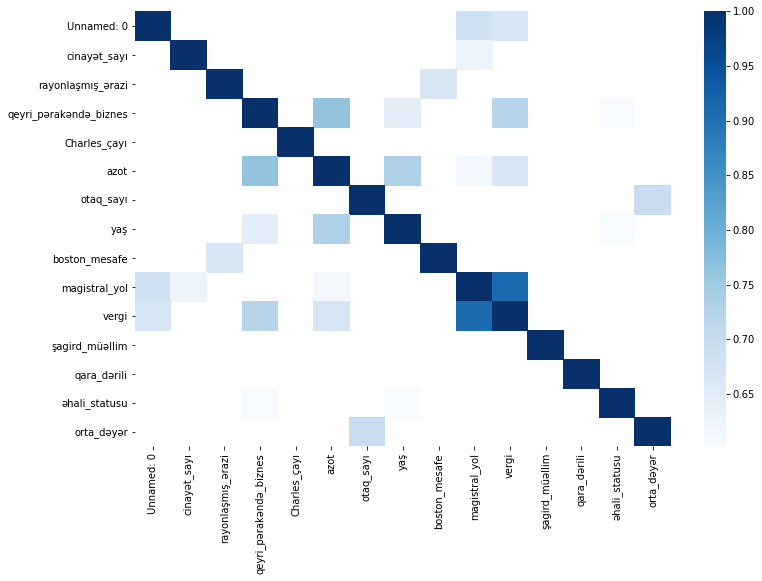

In [140]:
corr = df.corr()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

<AxesSubplot:>

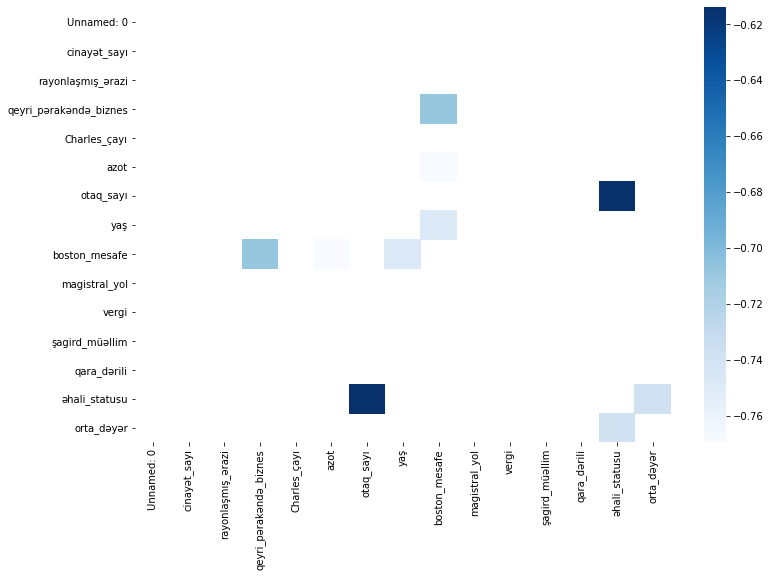

In [143]:
corr = df.corr()

kot = corr[corr<=-(.6)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

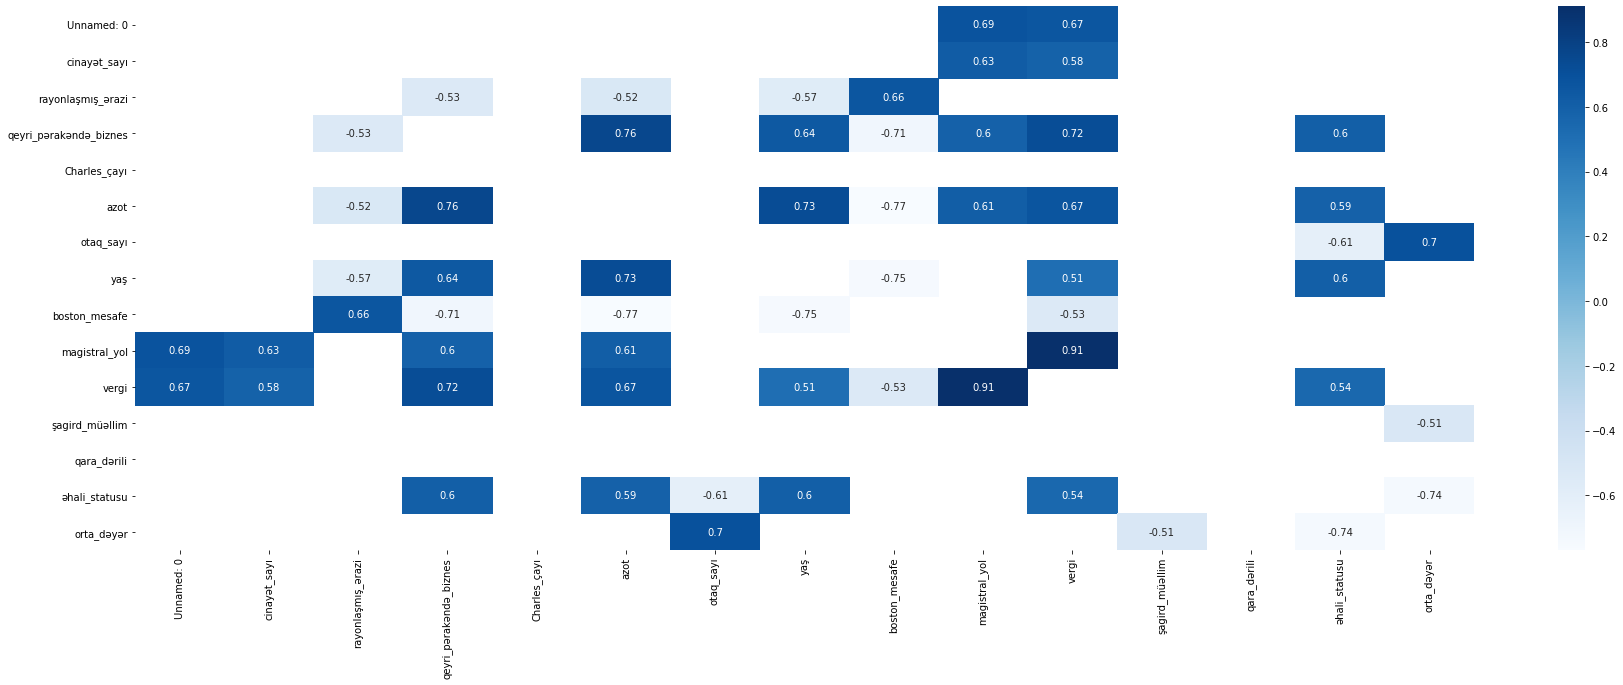

In [149]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Blues")
plt.show()

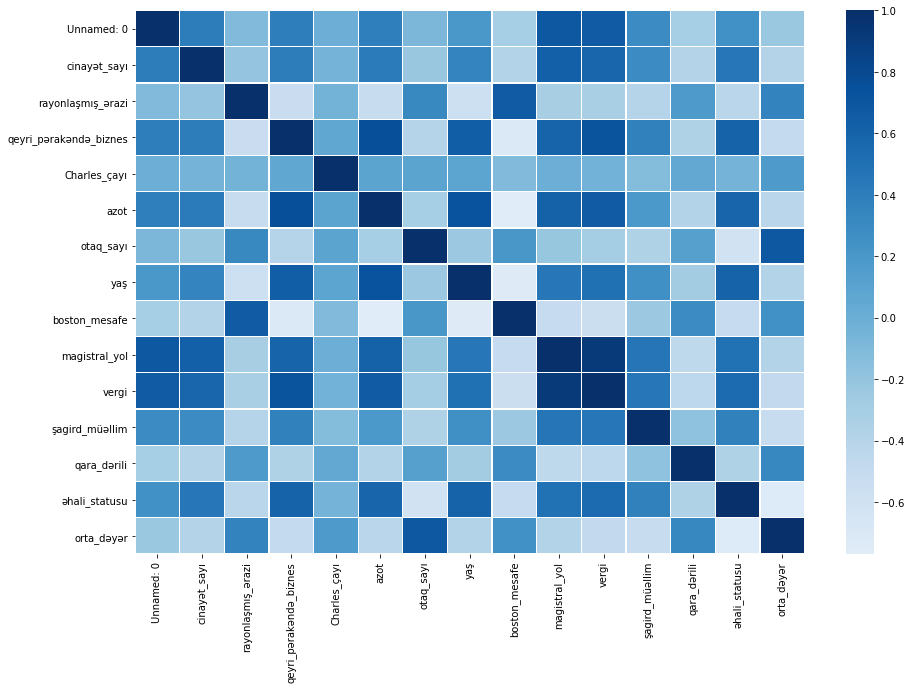

In [138]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',center=0, linewidths=.3, ax=ax,linecolor='white' )
 
plt.show()

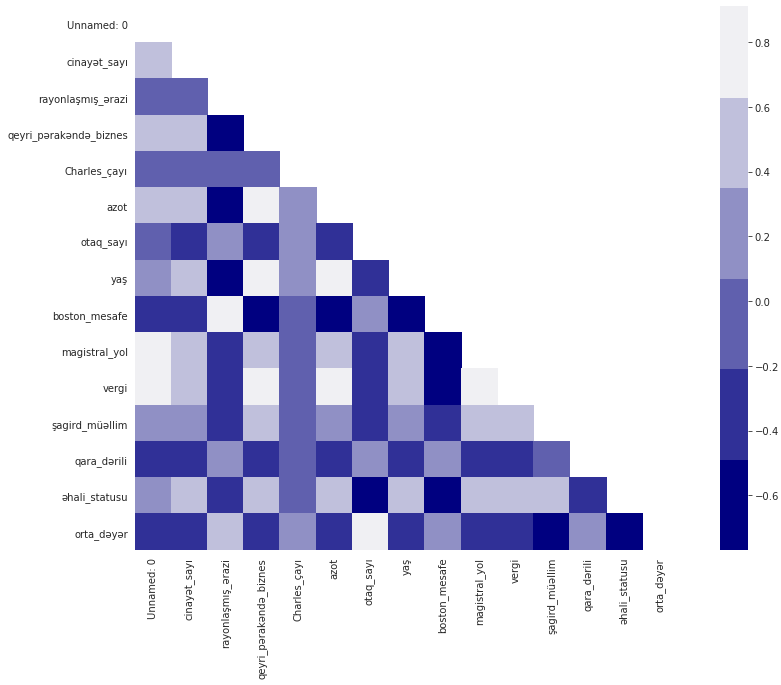

In [73]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
cmap =sns.light_palette("navy", reverse=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(df.corr(), mask=mask, square=True, cmap=cmap)

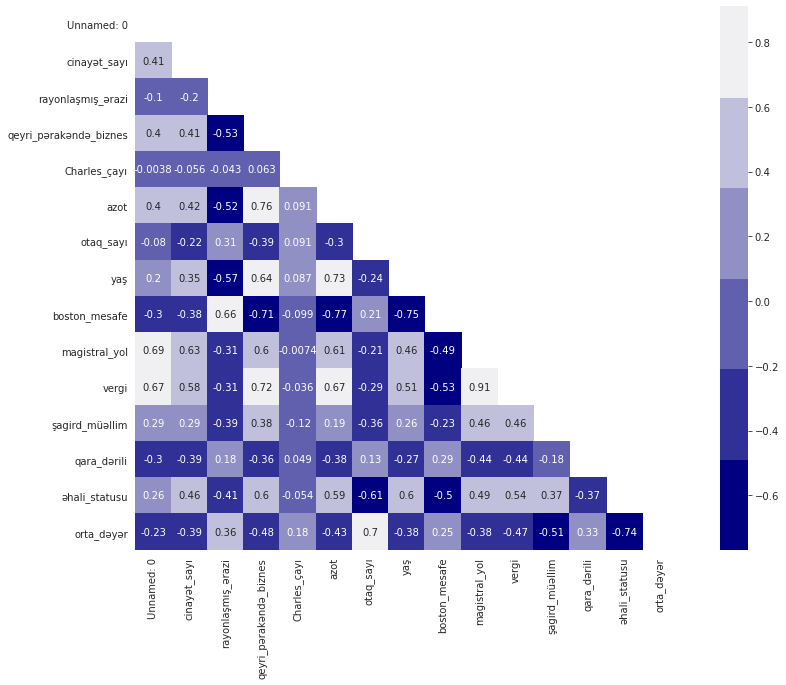

In [74]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
cmap =sns.light_palette("navy", reverse=True)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(df.corr(), mask=mask, square=True, cmap=cmap, annot=True)

Magistral yolların yaxınlaşdıqca vergilərin miqdarı artır. Beləliklə düz mütənasib aslılıq yaranır.

In [79]:
df['vergi'].corr(df['magistral_yol']).round(2)

0.91

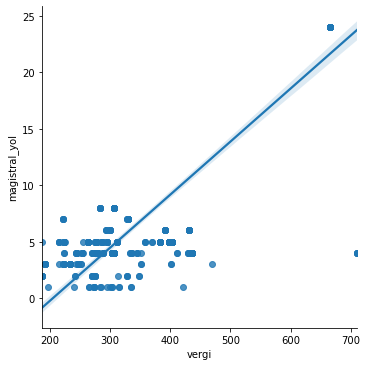

In [75]:
sns.lmplot(x="vergi", y="magistral_yol", data=df);

Əhalinin aşağı status faizi artıqca evlərin ortalama qiyməti artır. Beləliklə tərs mütənasib aslılıq yaranır.

In [80]:
df['orta_dəyər'].corr(df['əhali_statusu']).round(2)

-0.74

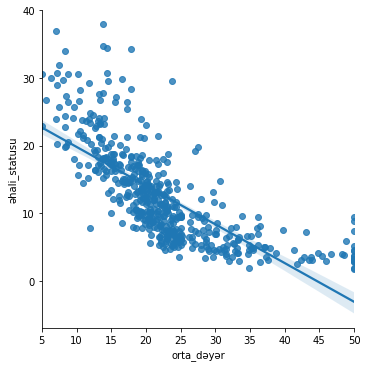

In [76]:
sns.lmplot(x="orta_dəyər", y="əhali_statusu", data=df);

Azot oksidlərinin konsentrasiyasının sayının artmasının qeyri pərakəndə biznes mərkəzlərinin sayı ilə düz mütənasibdir.

In [108]:
df['azot'].corr(df['qeyri_pərakəndə_biznes']).round(2)

0.76

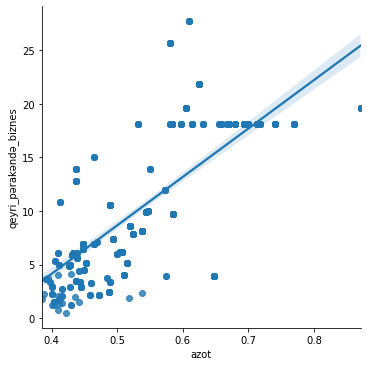

In [110]:
sns.lmplot(x='azot',y='qeyri_pərakəndə_biznes', data=df)

Otaq sayı artdıqca evlərin qiyməti artır. Düz mütənasib aslıqdır.

In [111]:
df['otaq_sayı'].corr(df['orta_dəyər']).round(2)

0.7

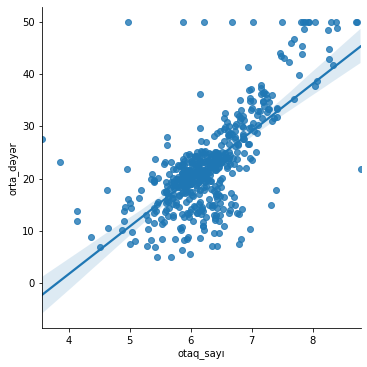

In [112]:
sns.lmplot(x='otaq_sayı',y='orta_dəyər', data=df)

Boston məşğulluq mərkəzinə çəkilmiş məsafələr artdıqca evlərin yaşları azalır.

#YAŞ - 1940-cı ildən əvvəl tikilmiş sahibi tərəfindən işğal edilmiş bölmələrin nisbəti

In [145]:
df['yaş'].corr(df['boston_mesafe']).round(2)

-0.75

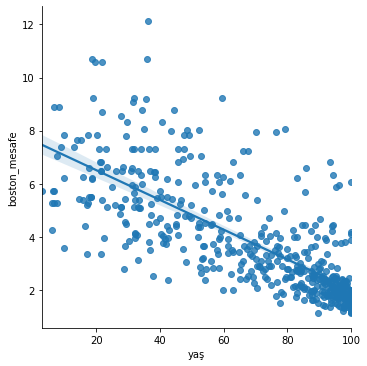

In [146]:
sns.lmplot(x='yaş',y='boston_mesafe', data=df)

Boston məşğulluq mərkəzinə çəkilmiş məsafələr artdıqca azotun oksidlərinin konsentrasiyasının sayı azalır. Tərs mütənasib aslılıqdır.

In [114]:
df['boston_mesafe'].corr(df['azot']).round(2)

-0.77

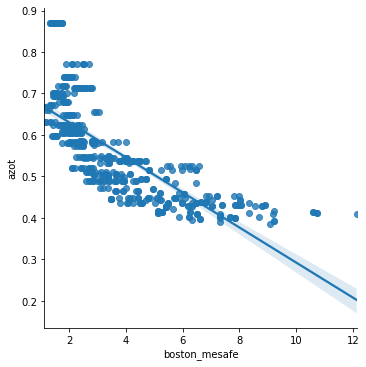

In [115]:
sns.lmplot(x='boston_mesafe',y='azot', data=df)

Magistral yol ilə Charles çayını əhatə etmək arasında aslılıq demək olar yoxdur.

In [117]:
df['magistral_yol'].corr(df['Charles_çayı']).round(2)

-0.01

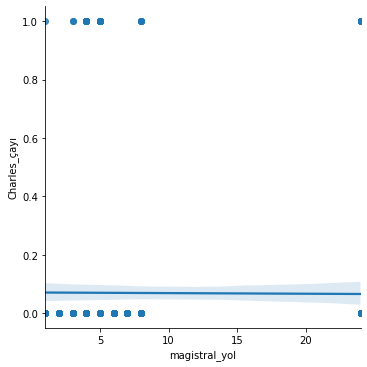

In [119]:
sns.lmplot(x='magistral_yol',y='Charles_çayı', data=df)

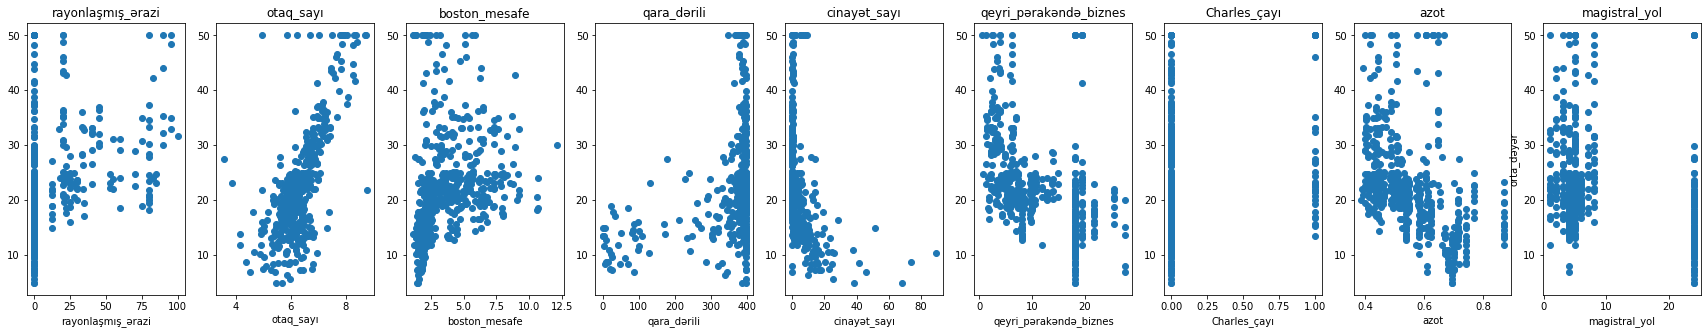

In [102]:
X= df[['rayonlaşmış_ərazi','otaq_sayı','boston_mesafe','qara_dərili','cinayət_sayı','qeyri_pərakəndə_biznes','Charles_çayı','azot','magistral_yol']]
Y= df['orta_dəyər']
plt.figure(figsize=(30, 5))
predictors = ['rayonlaşmış_ərazi','otaq_sayı','boston_mesafe','qara_dərili','cinayət_sayı','qeyri_pərakəndə_biznes','Charles_çayı','azot','magistral_yol']
target = df['orta_dəyər']
for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('orta_dəyər')
plt.show()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


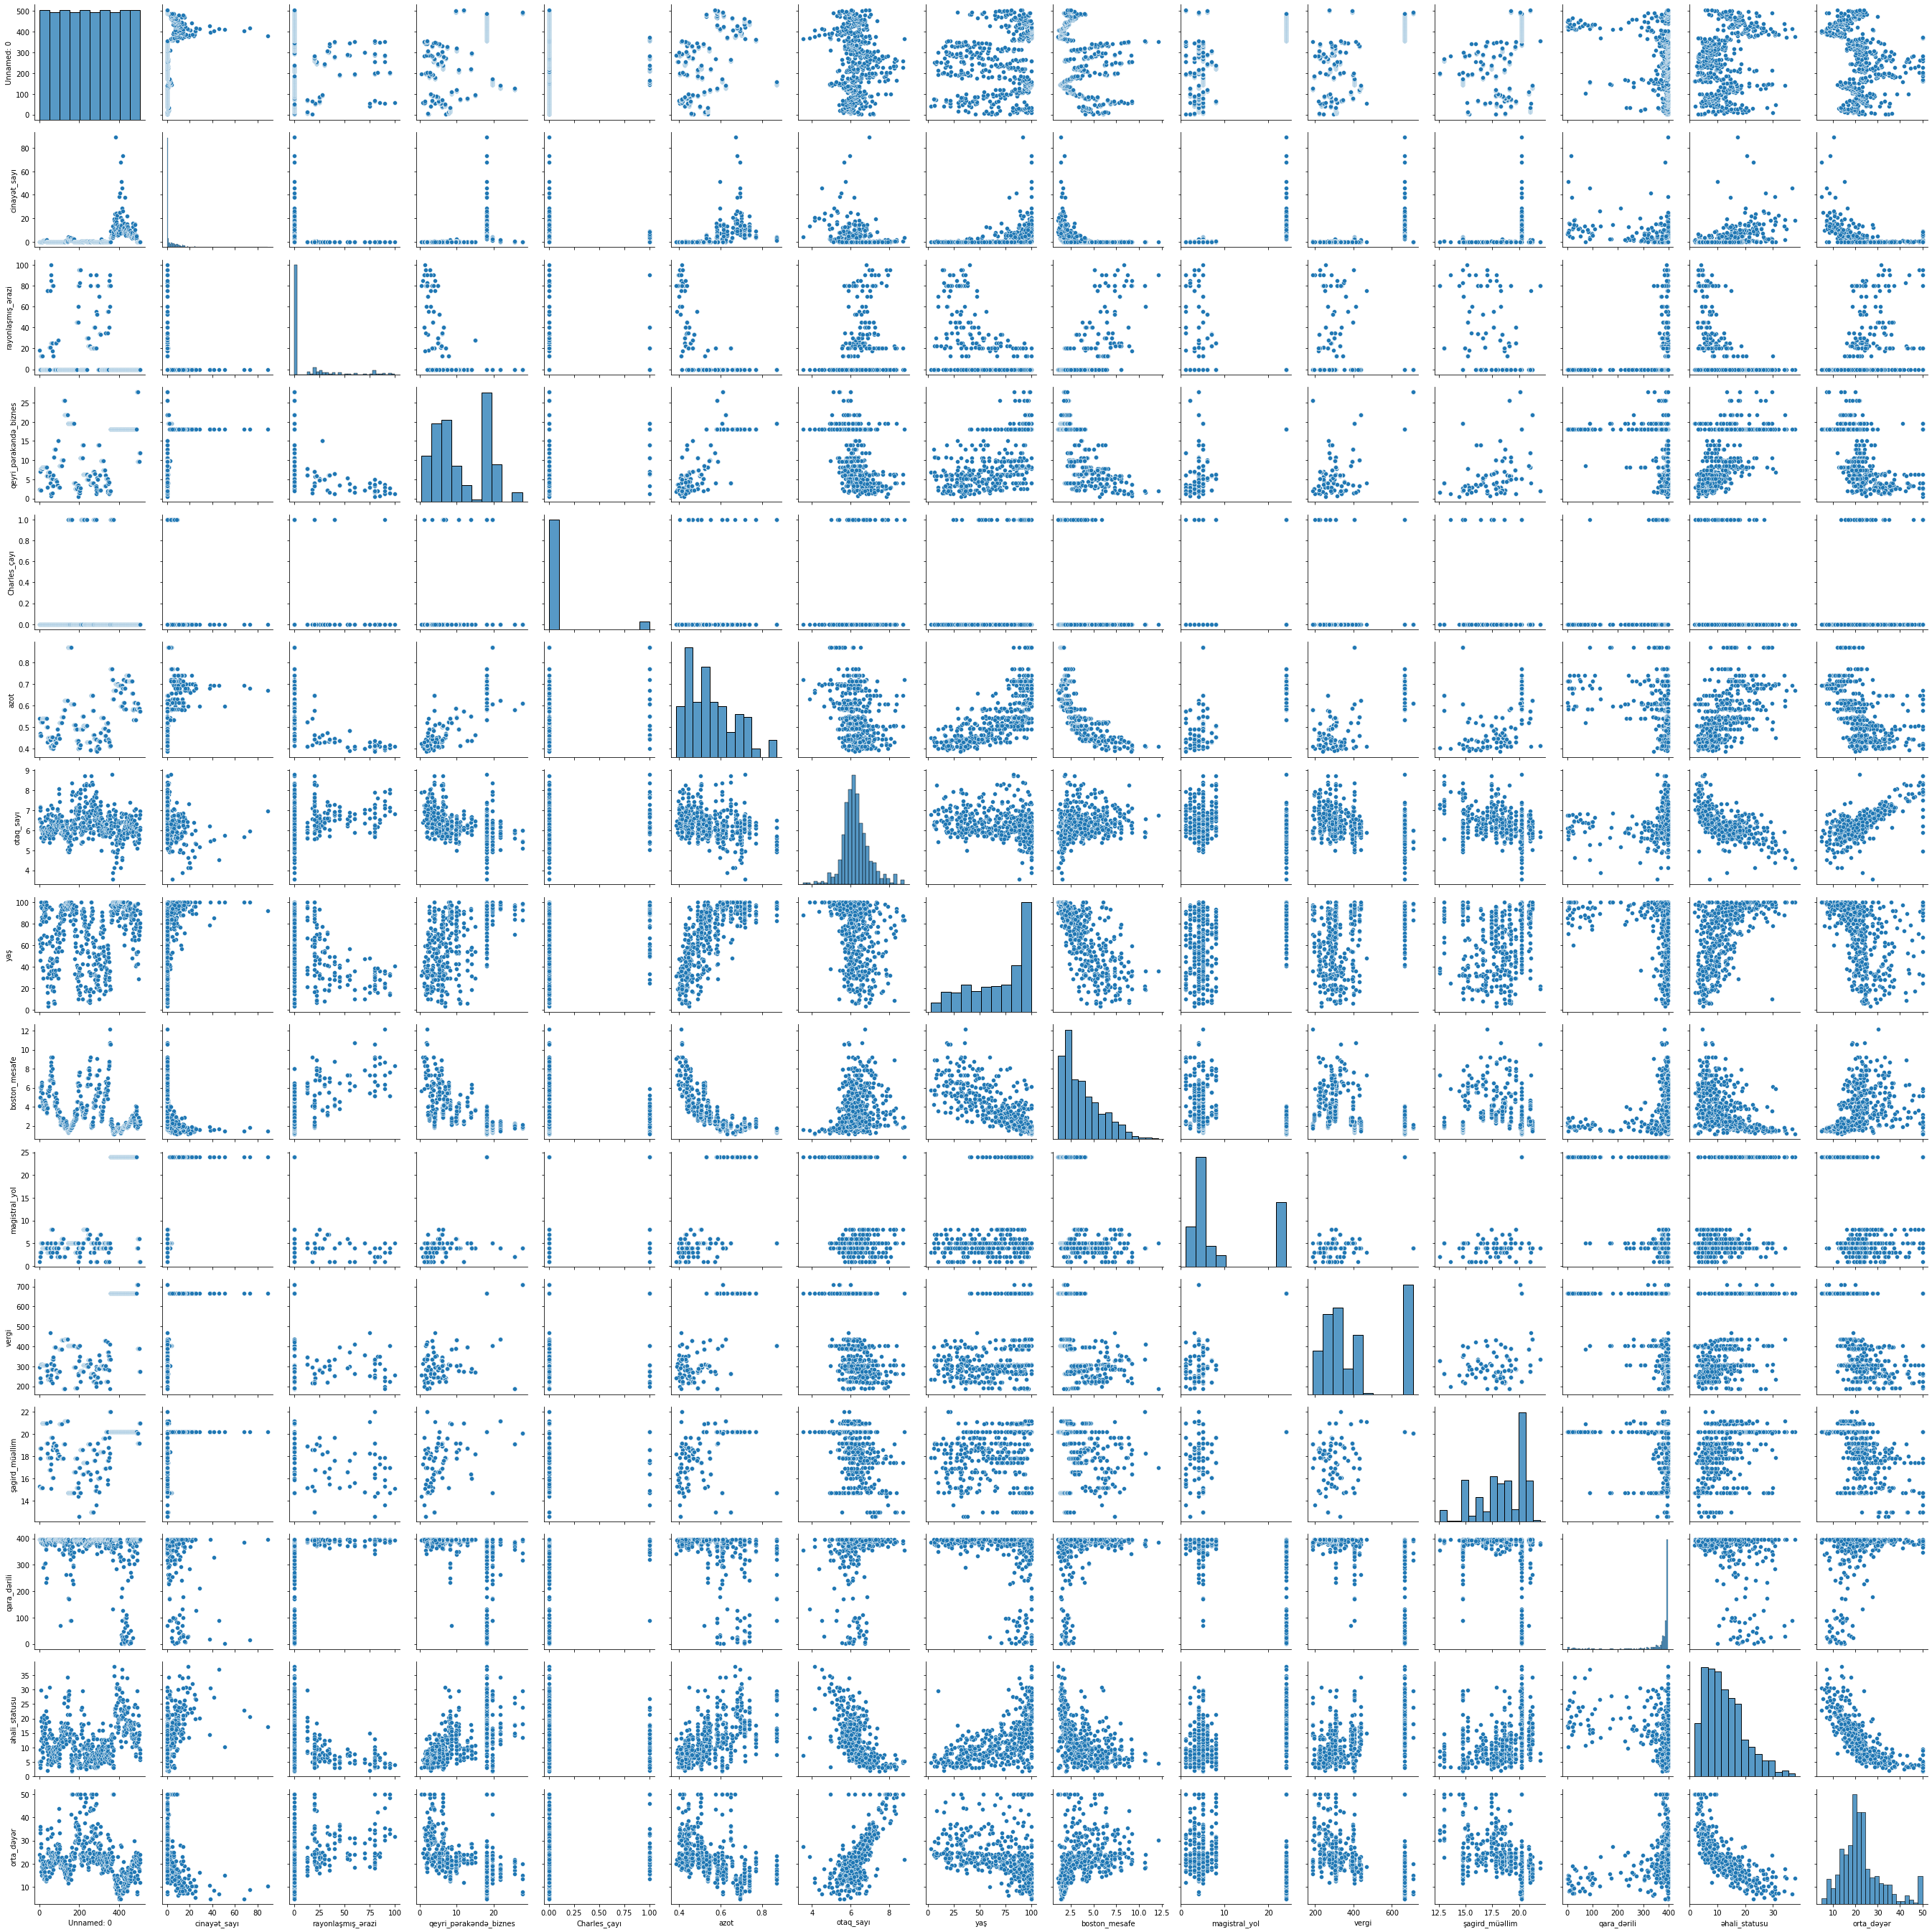

In [105]:
#sns.pairplot(df, size=2.5)
#plt.tight_layout()